# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hopspitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hopspitalization, ICU stats --PENDING--

### --PENDING-- US County - Alternative: NY Times
- Link: https://github.com/nytimes/covid-19-data/
- **Historic time series data:**
    - US States (cases, deaths) --PENDING--
    - US Counties (cases, deaths) --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [13]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

### Dataset 3: New York Times (Alternative Historic US State & County data)

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [14]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-06-20 00:00:00')

In [15]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-06-19 00:00:00')

In [16]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [17]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,8663136
Deaths,460011
Recovered,4245777
Active,3957348


In [18]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(25, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,2220962,119118,606715,1495129,2020-06-20 04:33:19,38.255249,-91.461384
Brazil,1032913,48954,551631,432328,2020-06-20 04:33:19,-12.669522,-48.480493
Russia,568292,7831,323851,236610,2020-06-20 04:33:19,54.546312,62.120860
India,395048,12948,213831,168269,2020-06-20 04:33:19,23.356511,82.081064
United Kingdom,303285,42546,1319,259420,2020-06-20 04:33:19,30.744028,-35.367255


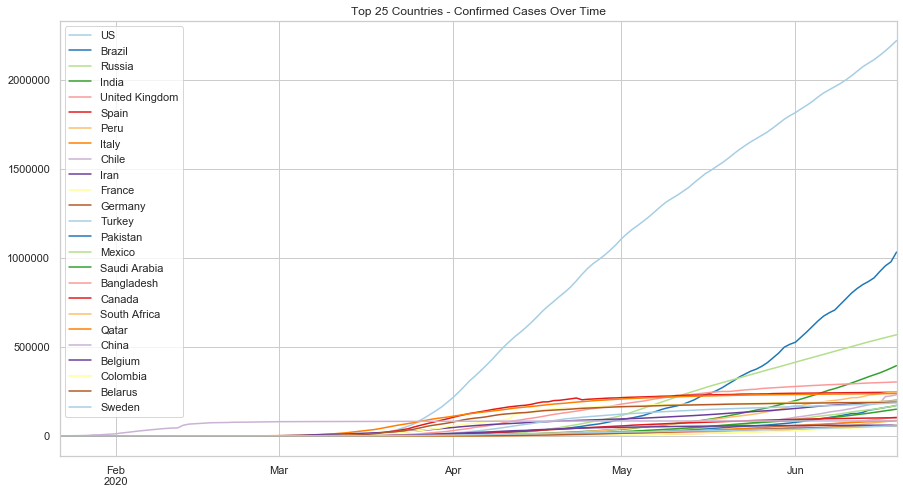

In [19]:
# Plot the top 25 countries confirmed infections over time
jh_hist_countries_cases[top_countries.index].plot(figsize=(15,8), title="Top 25 Countries - Confirmed Cases Over Time")

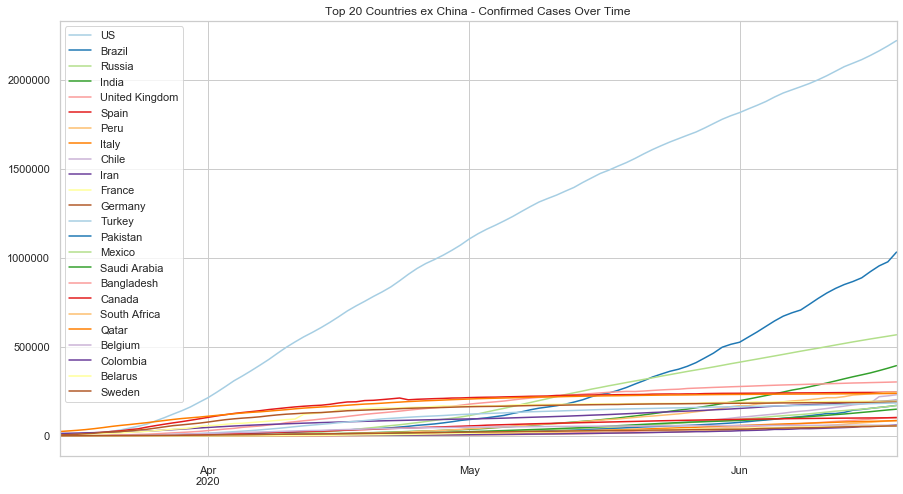

In [20]:
# Same chart but excluding China and starting on Mar 15 to zoom in
jh_hist_countries_cases[top_countries.index].loc[zoom_date:, top_countries.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

### US State Level

In [21]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_states.head(10)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,386556,31015,0,355541,2020-06-20 04:33:19,42.671593,-75.579694
California,170862,5426,0,165436,2020-06-20 04:33:19,37.778248,-120.728666
New Jersey,168496,12902,0,155594,2020-06-20 04:33:19,40.286441,-74.622450
Illinois,135470,6580,0,128890,2020-06-20 04:33:19,39.843618,-89.178330
Massachusetts,106650,7799,0,98851,2020-06-20 04:33:19,42.176400,-71.577050
Texas,105394,2158,0,103236,2020-06-20 04:33:19,31.678748,-98.515234
Florida,89748,3104,0,86644,2020-06-20 04:33:19,28.940755,-82.700744
Pennsylvania,85199,6399,0,78800,2020-06-20 04:33:19,40.818078,-77.615318
Michigan,67097,6067,0,61030,2020-06-20 04:33:19,44.011649,-85.131303


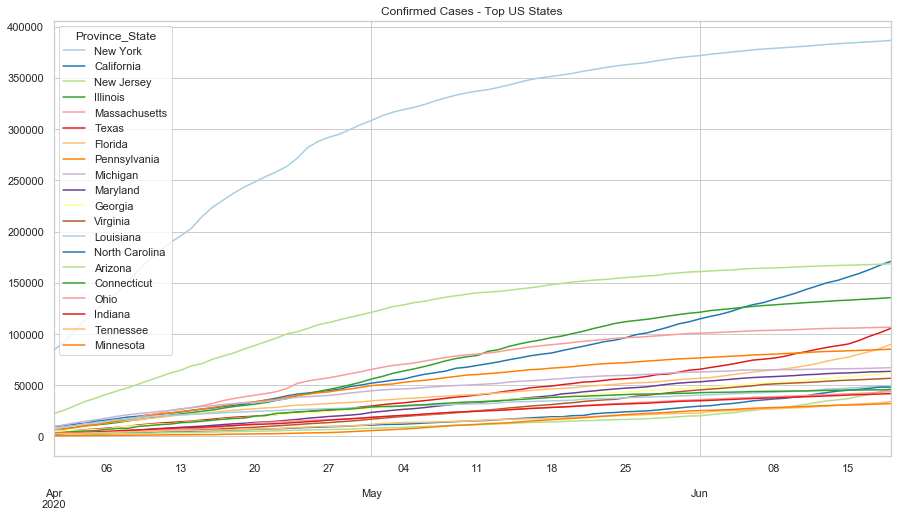

In [22]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

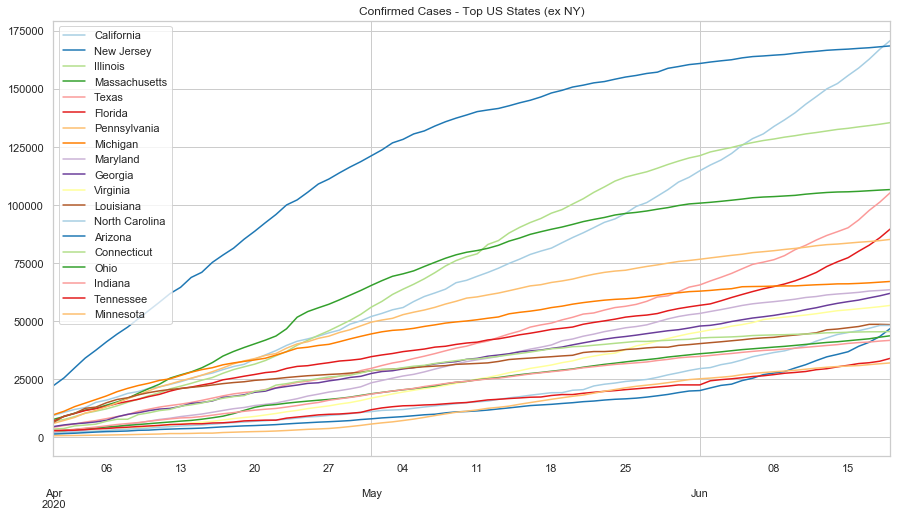

In [23]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

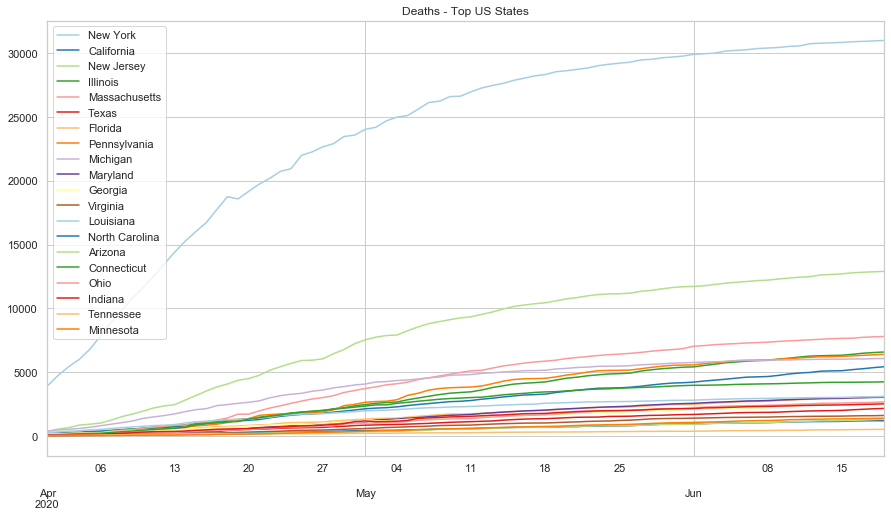

In [24]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

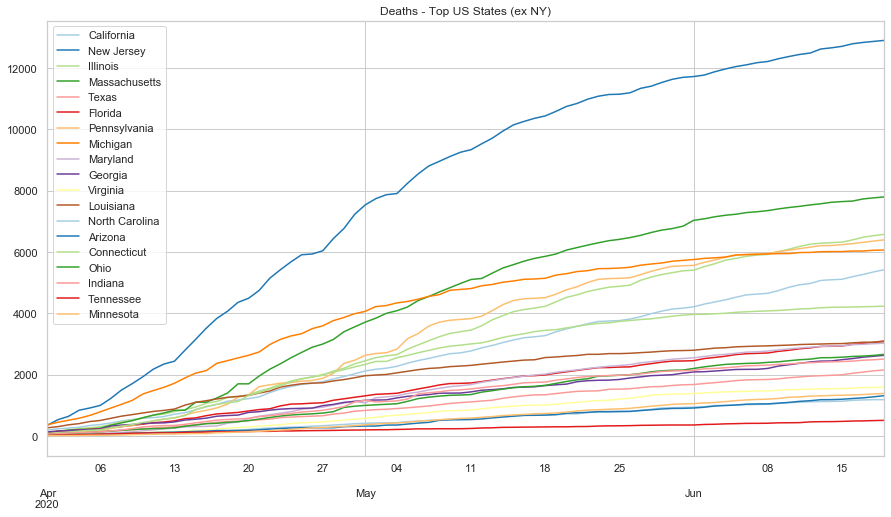

In [25]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_states.index].loc[zoom_date2:, top_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [26]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(10, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,23464,1791,0,21673,2020-06-20 04:33:19,42.486077,-71.390492,25017.0
Suffolk,19493,971,0,18522,2020-06-20 04:33:19,42.327951,-71.078504,25025.0
Essex,15778,1065,0,14713,2020-06-20 04:33:19,42.668763,-70.946872,25009.0
Worcester,12085,893,0,11192,2020-06-20 04:33:19,42.350270,-71.904934,25027.0
Norfolk,8962,907,0,8055,2020-06-20 04:33:19,42.160731,-71.205304,25021.0


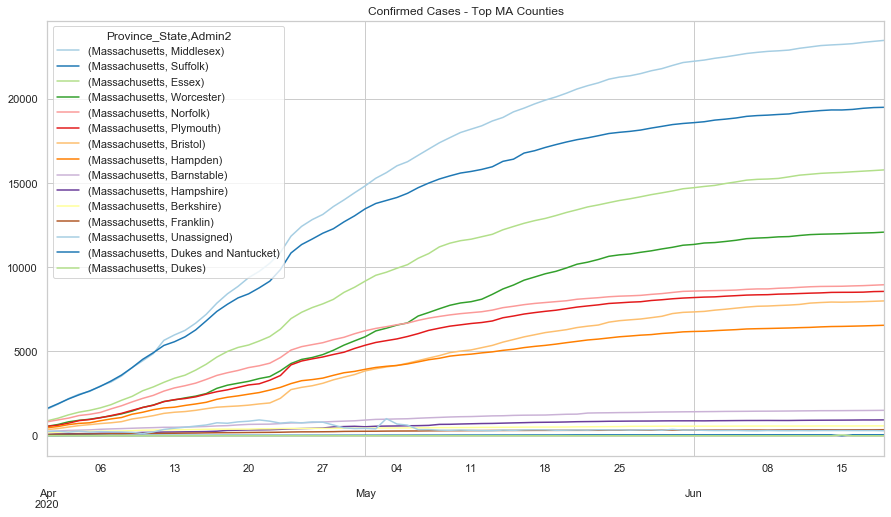

In [27]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(15).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

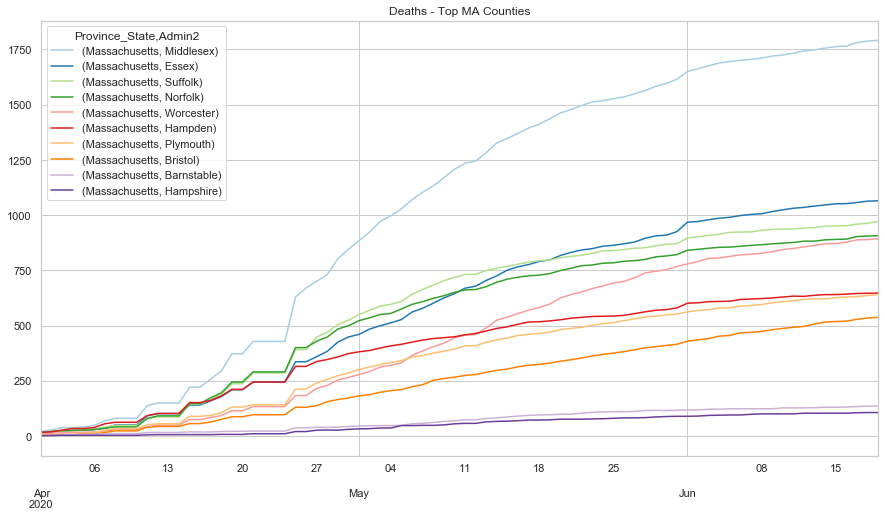

In [28]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [29]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,79655,3065,0,76590,2020-06-20 04:33:19,34.308284,-118.228241,6037.0
Riverside,12778,410,0,12368,2020-06-20 04:33:19,33.743150,-115.993358,6065.0
San Diego,10350,332,0,10018,2020-06-20 04:33:19,33.034846,-116.736533,6073.0
Orange,9576,257,0,9319,2020-06-20 04:33:19,33.701475,-117.764600,6059.0
San Bernardino,8714,230,0,8484,2020-06-20 04:33:19,34.840603,-116.177469,6071.0
Imperial,4744,64,0,4680,2020-06-20 04:33:19,33.039308,-115.366904,6025.0
Alameda,4702,119,0,4583,2020-06-20 04:33:19,37.646294,-121.892927,6001.0


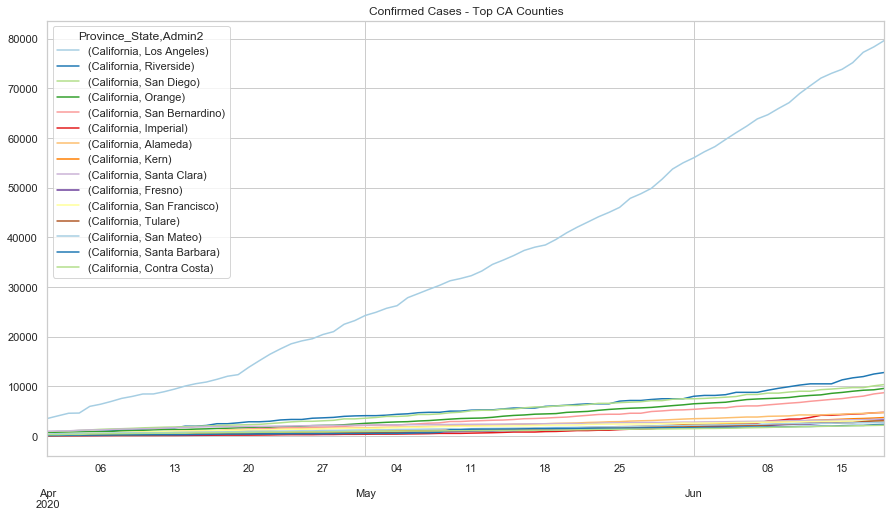

In [30]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

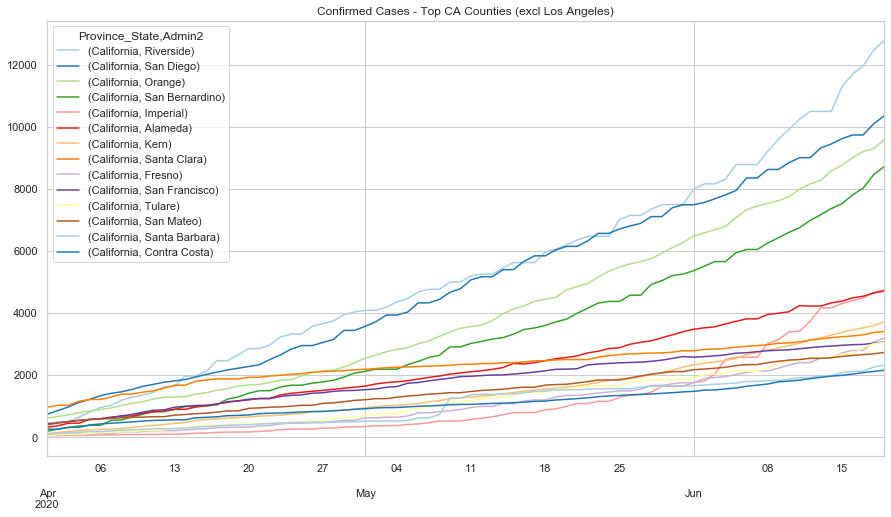

In [31]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

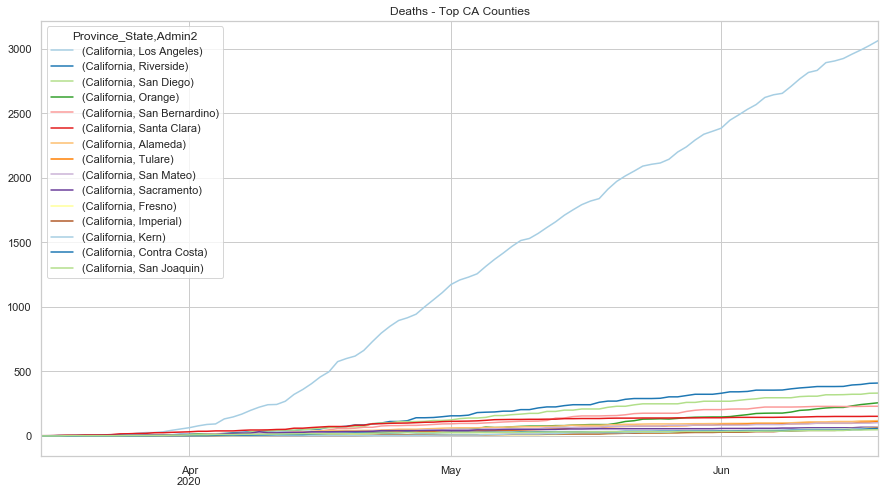

In [32]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

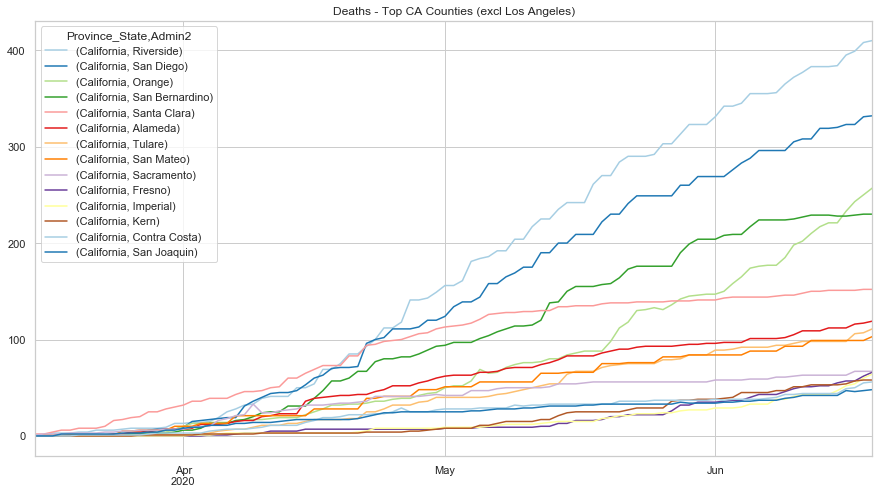

In [33]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [34]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [35]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [36]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [37]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [38]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",9576,257,0,9319,2020-06-20 04:33:19,33.701475,-117.764600
"(Massachusetts, Middlesex)",23464,1791,0,21673,2020-06-20 04:33:19,42.486077,-71.390492
"(Massachusetts, Suffolk)",19493,971,0,18522,2020-06-20 04:33:19,42.327951,-71.078504
"(Massachusetts, Essex)",15778,1065,0,14713,2020-06-20 04:33:19,42.668763,-70.946872
"(Massachusetts, Bristol)",8002,537,0,7465,2020-06-20 04:33:19,41.792284,-71.108722
Costa Rica,2058,12,982,1064,2020-06-20 04:33:19,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [39]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [40]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [41]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                        Costa Rica
Admin2             Orange     Middlesex Suffolk  Essex Bristol           
2020-06-12           8153         23075   19249  15518    7872       1612
2020-06-13           8269         23156   19299  15573    7906       1662
2020-06-14           8573         23195   19335  15604    7933       1715
2020-06-15           8759         23227   19334  15627    7925       1744
2020-06-16           8999         23269   19367  15667    7940       1796
2020-06-17           9197         23346   19434  15703    7956       1871
2020-06-18           9292         23407   19477  15739    7979       1939
2020-06-19           9576         23464   19493  15778    8002       2058

In [42]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

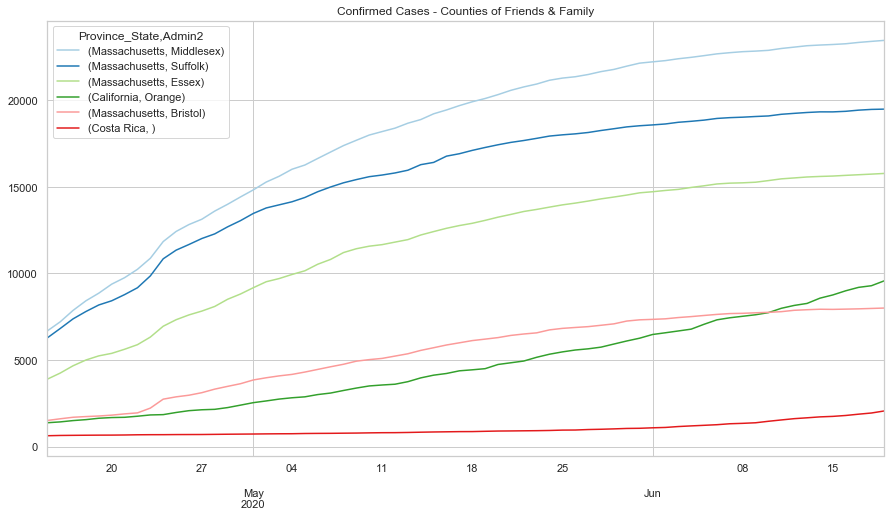

In [43]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date3:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [44]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [45]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [46]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [47]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2020-06-12            210          1744     941  1035     496         10   
2020-06-13            217          1748     943  1041     507         10   
2020-06-14            221          1756     950  1046     516         10   
2020-06-15            221          1763     951  1051     518         10   
2020-06-16            233          1765     952  1052     520          9   
2020-06-17            243          1781     959  1057     528          9   
2020-06-18            250          1788     963  1063     534         10   
2020-06-19            257          1791     971  1065     537         10   

Province_State Costa Rica  
Admin2                     
2020-06-12             12  
2020-06-13             12  
2020-06-14             12  
2020-06-15             12  
2020-06-16             12  
2020-06-17             12  
2020-06-18             12  
2020-06-19             12

In [48]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

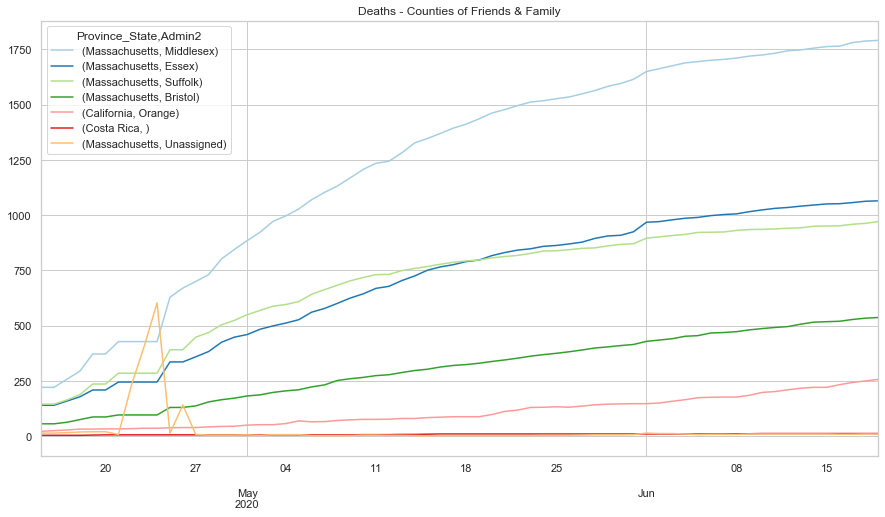

In [49]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date3:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))